<a href="https://colab.research.google.com/github/NeilCollinsMS/CTU-13-Classification/blob/main/CTU_13_Classification_(Per_Scenario).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CTU-13 Classification Project**

Per-Scenario Notbook (Each scenario is its own training and testing data)

Alternate notebook will be generated for aggregate models utilizing master data.

These models are general models built with 80/20 train/test splits. They are not tuned at all, and are for general insights and information when I begin tuning aggregate data models. 

In [ ]:
# Import Libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score 
from matplotlib import pyplot as plt

In [ ]:
# Load publicly accessible CTU-13 bidirectional netflow files into pandas dataframes. 
# Initially, I ran some .head() commands to make sure the data properly imported, but to avoid clutter, I will condense all of the file reading into one singular cell.
# If you want to look at the dataframes just type scenario_# (dataframe names) into a cell and you'll get a combo of heads/tails in Google Colab.

# Unfortunately, Google Colab hosts notebooks on virtual machines that it recycles every time the notebook disconnects. However, since each VM has limited RAM only run the necessary files.

# scenario_1 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-42/detailed-bidirectional-flow-labels/capture20110810.binetflow')
# scenario_2 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-43/detailed-bidirectional-flow-labels/capture20110811.binetflow')
# scenario_3 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-44/detailed-bidirectional-flow-labels/capture20110812.binetflow')
# scenario_4 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-45/detailed-bidirectional-flow-labels/capture20110815.binetflow')
# scenario_5 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-46/detailed-bidirectional-flow-labels/capture20110815-2.binetflow')
# scenario_6 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-47/detailed-bidirectional-flow-labels/capture20110816.binetflow')
# scenario_7 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-48/detailed-bidirectional-flow-labels/capture20110816-2.binetflow')
# scenario_8 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-49/detailed-bidirectional-flow-labels/capture20110816-3.binetflow')
# scenario_9 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-50/detailed-bidirectional-flow-labels/capture20110817.binetflow')
# scenario_10 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-51/detailed-bidirectional-flow-labels/capture20110818.binetflow')
# scenario_11 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-52/detailed-bidirectional-flow-labels/capture20110818-2.binetflow')
# scenario_12 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-53/detailed-bidirectional-flow-labels/capture20110819.binetflow')
# scenario_13 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-54/detailed-bidirectional-flow-labels/capture20110815-3.binetflow')

**Scenario 1 Model 1**

In [ ]:
# Running all 13 scenarios takes a lot of RAM, so I am only using one at a time to not exceed Colab's RAM limit
scenario_1 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-42/detailed-bidirectional-flow-labels/capture20110810.binetflow')

In [ ]:
# Generate binary malicious target column
scenario_1.loc[scenario_1['SrcAddr'] == '147.32.84.165', 'Malicious'] = 1
scenario_1.loc[scenario_1['SrcAddr'] != '147.32.84.165', 'Malicious'] = 0

In [ ]:
# Checking to make sure that binary assignments worked
display(scenario_1.loc[scenario_1['SrcAddr'] == '147.32.84.165'])
display(scenario_1.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
675537,2011/08/10 11:04:24.863449,0.000278,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V42-UDP-DNS,1.0
675872,2011/08/10 11:04:27.118993,0.020525,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V42-UDP-DNS,1.0
675877,2011/08/10 11:04:27.140727,0.045125,tcp,147.32.84.165,1027,->,74.125.232.195,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V42-TCP-HTTP-Google-Net-Estab...,1.0
689920,2011/08/10 11:06:23.268442,0.336250,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,215,71,flow=From-Botnet-V42-UDP-DNS,1.0
689955,2011/08/10 11:06:23.606888,3514.083496,tcp,147.32.84.165,1039,->,60.190.222.139,65520,SPA_SPA,0.0,0.0,120,7767,2690,flow=From-Botnet-V42-TCP-Established,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785281,2011/08/10 15:48:48.058272,0.000000,udp,147.32.84.165,2077,->,89.149.254.87,53,INT,0.0,NaN,1,72,72,flow=From-Botnet-V42-UDP-Attempt-DNS,1.0
2785303,2011/08/10 15:48:48.338346,0.000000,tcp,147.32.84.165,1081,->,202.59.166.29,25,S_,0.0,NaN,1,62,62,flow=From-Botnet-V42-TCP-Attempt-SPAM,1.0
2785326,2011/08/10 15:48:48.448462,0.000405,udp,147.32.84.165,2079,<->,147.32.80.9,53,CON,0.0,0.0,2,138,69,flow=From-Botnet-V42-UDP-DNS,1.0
2785382,2011/08/10 15:48:49.059334,0.056870,udp,147.32.84.165,2077,<->,188.65.208.29,53,CON,0.0,0.0,2,144,72,flow=From-Botnet-V42-UDP-DNS,1.0


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
0,2011/08/10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,0.0,0.0,12,875,413,flow=Background-UDP-Established,0.0
1,2011/08/10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,flow=Background-UDP-Established,0.0
2,2011/08/10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,0.0,0.0,2,120,60,flow=Background,0.0
3,2011/08/10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,0.0,0.0,3,180,120,flow=Background,0.0
4,2011/08/10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,0.0,0.0,42,2856,1596,flow=Background-UDP-Established,0.0


In [ ]:
# Break data into target and features
y1 = scenario_1.Malicious
features = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes']
X1 = scenario_1[features].copy()

# Break data into training and testing data (80/20 split)
X1_train, X1_test, y1_train, y1_test, = train_test_split(X1,y1, train_size = 0.8, test_size = 0.2, random_state = 1)

In [ ]:
# Generate base model
classifier_1 = RandomForestClassifier(max_leaf_nodes = 100, random_state = 1)

# Fit model to training data
classifier_1.fit(X1_train,y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# Very high accuracy score...potential overfitting? Considering lowering leaf nodes or using 5 fold validation. 
predictions1 = classifier_1.predict(X1_test)

accuracy_score(y1_test, predictions1)

0.9919334853291039

In [ ]:
pd.Series(y1_test).value_counts()

0.0    556617
1.0      8311
Name: Malicious, dtype: int64

In [ ]:
pd.Series(predictions1).value_counts()

0.0    560056
1.0      4872
dtype: int64

In [ ]:
# Decently solid F1 score, but could cause issues
f1_score(y1_test, predictions1)

0.6543275430478647

In [ ]:
# Model skewed towards false negatives. High number of True Negatives likely creating high accuracy score. Lean F1 here.

labels1 = np.unique(y1_test)
cm1 = confusion_matrix(y1_test, predictions1, labels=labels1)
pd.DataFrame(cm1, index=labels1, columns=labels1)

,0.0,1.0
0.0,556058,559
1.0,3998,4313


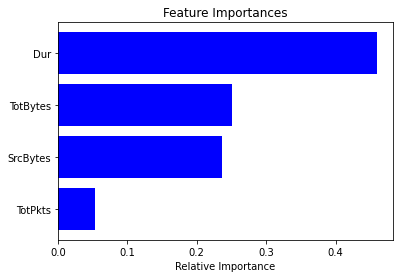

In [ ]:
importances1 = classifier_1.feature_importances_
indices1 = np.argsort(importances1)

plt.title('Feature Importances')
plt.barh(range(len(indices1)), importances1[indices1], color='b', align='center')
plt.yticks(range(len(indices1)), [features[i] for i in indices1])
plt.xlabel('Relative Importance')
plt.show()

**Scenario 2 Model 1**

In [ ]:
scenario_2 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-43/detailed-bidirectional-flow-labels/capture20110811.binetflow')

In [ ]:
# Generate binary malicious target column
scenario_2.loc[scenario_2['SrcAddr'] == '147.32.84.165', 'Malicious'] = 1
scenario_2.loc[scenario_2['SrcAddr'] != '147.32.84.165', 'Malicious'] = 0

In [ ]:
# Checking to make sure that binary assignments worked
display(scenario_2.loc[scenario_2['SrcAddr'] == '147.32.84.165'])
display(scenario_2.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
353034,2011/08/11 10:27:20.087827,0.000151,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V43-UDP-DNS,1.0
353266,2011/08/11 10:27:22.334730,0.019477,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V43-UDP-DNS,1.0
353271,2011/08/11 10:27:22.355042,0.045459,tcp,147.32.84.165,1027,->,74.125.232.198,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V43-TCP-HTTP-Google-Net-Estab...,1.0
389373,2011/08/11 10:32:25.092354,0.200739,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,553,78,flow=From-Botnet-V43-UDP-DNS,1.0
389398,2011/08/11 10:32:25.294505,500.002960,tcp,147.32.84.165,1039,->,195.113.232.98,80,SPA_FSPA,0.0,0.0,14,5498,531,flow=From-Botnet-V43-TCP-Established-HTTP-Ad-40,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780033,2011/08/11 13:55:27.981810,2.982934,tcp,147.32.84.165,1123,->,67.195.168.230,25,S_,0.0,NaN,2,124,124,flow=From-Botnet-V43-TCP-Attempt-SPAM,1.0
1780035,2011/08/11 13:55:28.000203,0.139268,tcp,147.32.84.165,4383,->,217.163.21.39,80,FSPA_FSPA,0.0,0.0,10,1451,701,flow=From-Botnet-V43-TCP-WEB-Established,1.0
1780036,2011/08/11 13:55:28.000218,2.964543,tcp,147.32.84.165,1124,->,64.12.138.161,25,S_,0.0,NaN,2,124,124,flow=From-Botnet-V43-TCP-Attempt-SPAM,1.0
1780572,2011/08/11 13:55:34.577108,0.027338,tcp,147.32.84.165,4541,->,46.4.36.120,443,S_RA,0.0,0.0,2,122,62,flow=From-Botnet-V43-TCP-Attempt,1.0


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
0,2011/08/11 09:49:35.721274,2069.973145,udp,203.253.8.233,30533,<->,147.32.84.229,13363,CON,0.0,0.0,3,197,123,flow=Background-UDP-Established,0.0
1,2011/08/11 09:49:35.721530,895.989258,tcp,81.47.154.13,49200,<?>,147.32.84.229,13363,RPA_PA,0.0,0.0,70,7032,4501,flow=Background,0.0
2,2011/08/11 09:49:35.721918,0.000120,udp,147.32.84.229,13363,->,78.42.25.171,42988,INT,0.0,NaN,3,2858,2858,flow=Background-UDP-Attempt,0.0
3,2011/08/11 09:49:35.722518,3561.927246,udp,147.32.84.229,13363,<->,113.128.219.130,59790,CON,0.0,0.0,63,15770,13419,flow=Background-UDP-Established,0.0
4,2011/08/11 09:49:35.723816,0.000000,udp,147.32.84.229,13363,->,60.50.167.24,40253,INT,0.0,NaN,1,60,60,flow=Background-UDP-Attempt,0.0


In [ ]:
# Break data into target and features
y2 = scenario_2.Malicious
features = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes']
X2 = scenario_2[features].copy()

# Break data into training and testing data (80/20 split)
X2_train, X2_test, y2_train, y2_test, = train_test_split(X2,y2, train_size = 0.8, test_size = 0.2, random_state = 1)

In [ ]:
# Generate base model
classifier_2 = RandomForestClassifier(max_leaf_nodes = 100, random_state = 1)

# Fit model to training data
classifier_2.fit(X2_train,y2_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# Another very high accuracy score...potentially useless metric, very high TNs
predictions2 = classifier_2.predict(X2_test)

accuracy_score(y2_test, predictions2)

0.9956916695471828

In [ ]:
# Much better F1 score than prior model... This reinvigorates my idea that insights can be derived from per-scenario models. 
f1_score(y2_test, predictions2)

0.8002564102564103

In [ ]:
# Similar issue with model being skewed towards false negatives, but to a much less extent than before, hence the improved F1
labels2 = np.unique(y2_test)
cm2 = confusion_matrix(y2_test, predictions2, labels=labels2)
pd.DataFrame(cm2, index=labels2, columns=labels2)

,0.0,1.0
0.0,356946,487
1.0,1071,3121


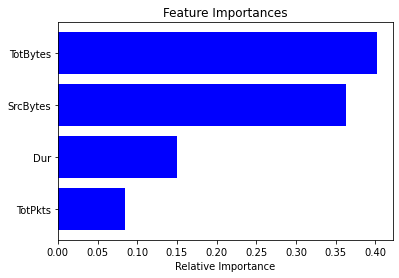

In [ ]:
# Very interesting that importance differed here. Aggregate model generation should provide us with some fun insights.

importances2 = classifier_2.feature_importances_
indices2 = np.argsort(importances2)

plt.title('Feature Importances')
plt.barh(range(len(indices2)), importances2[indices2], color='b', align='center')
plt.yticks(range(len(indices2)), [features[i] for i in indices2])
plt.xlabel('Relative Importance')
plt.show()

**Scenario 3 Model 1**

In [ ]:
scenario_3 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-44/detailed-bidirectional-flow-labels/capture20110812.binetflow')

In [ ]:
# Generate binary malicious target column
scenario_3.loc[scenario_3['SrcAddr'] == '147.32.84.165', 'Malicious'] = 1
scenario_3.loc[scenario_3['SrcAddr'] != '147.32.84.165', 'Malicious'] = 0

In [ ]:
# Checking to make sure that binary assignments worked
display(scenario_3.loc[scenario_3['SrcAddr'] == '147.32.84.165'])
display(scenario_3.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
61467,2011/08/12 15:53:17.142311,1966.745239,icmp,147.32.84.165,0x0303,->,81.166.246.198,0x8769,URP,0.0,NaN,3,285,285,flow=From-Botnet-V44-ICMP,1.0
178229,2011/08/12 16:56:52.873156,0.000456,udp,147.32.84.165,1026,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Botnet-V44-UDP-DNS,1.0
181700,2011/08/12 16:59:13.459181,0.121586,udp,147.32.84.165,1026,<->,147.32.80.9,53,CON,0.0,0.0,2,292,72,flow=From-Botnet-V44-UDP-DNS,1.0
181705,2011/08/12 16:59:13.581498,10.362481,tcp,147.32.84.165,1046,->,74.207.254.18,80,SPA_FSPA,0.0,0.0,9,1118,385,flow=From-Botnet-V44-TCP-WEB-Established,1.0
181711,2011/08/12 16:59:13.934712,0.101143,udp,147.32.84.165,1026,<->,147.32.80.9,53,CON,0.0,0.0,2,284,68,flow=From-Botnet-V44-UDP-DNS,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520227,2011/08/15 09:25:26.819651,9.014144,tcp,147.32.84.165,2909,->,223.255.170.91,22,S_,0.0,NaN,3,186,186,flow=From-Botnet-V44-TCP-Attempt,1.0
4520295,2011/08/15 09:25:28.020389,9.013652,tcp,147.32.84.165,2910,->,223.255.178.83,22,S_,0.0,NaN,3,186,186,flow=From-Botnet-V44-TCP-Attempt,1.0
4532883,2011/08/15 09:29:18.079118,0.000000,udp,147.32.84.165,137,->,192.168.88.121,45366,INT,0.0,NaN,1,104,104,flow=From-Botnet-V44-UDP-Attempt,1.0
4576820,2011/08/15 09:42:00.883399,0.000000,udp,147.32.84.165,137,->,192.168.88.121,43886,INT,0.0,NaN,1,104,104,flow=From-Botnet-V44-UDP-Attempt,1.0


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
0,2011/08/12 15:24:01.105063,75.532112,tcp,74.125.108.243,80,<?>,147.32.86.187,55707,FPA_FA,0.0,0.0,8107,10096400,10005608,flow=Background,0.0
1,2011/08/12 15:24:01.105402,6.650236,tcp,147.32.84.164,22,<?>,83.208.193.123,15173,FPA_FPA,0.0,0.0,33,3218,1532,flow=From-Normal-V44-Grill,0.0
2,2011/08/12 15:24:01.106568,3599.641602,tcp,217.168.211.184,3953,<?>,147.32.84.14,22,PA_PA,0.0,0.0,1604343,1585303458,38328160,flow=Background,0.0
3,2011/08/12 15:24:01.113763,1341.314453,udp,173.9.132.155,54369,<->,147.32.84.59,15046,CON,0.0,0.0,284072,243446592,120384296,flow=Background-Established-cmpgw-CVUT,0.0
4,2011/08/12 15:24:01.119062,3599.992920,tcp,88.103.40.117,37378,<?>,147.32.84.59,56306,PA_PA,0.0,0.0,229138,213637628,206786146,flow=Background-Established-cmpgw-CVUT,0.0


In [ ]:
# Break data into target and features
y3 = scenario_3.Malicious
features = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes']
X3 = scenario_3[features].copy()

# Break data into training and testing data (80/20 split)
X3_train, X3_test, y3_train, y3_test, = train_test_split(X3,y3, train_size = 0.8, test_size = 0.2, random_state = 1)

In [ ]:
# Generate base model
classifier_3 = RandomForestClassifier(max_leaf_nodes = 100, random_state = 1)

# Fit model to training data
classifier_3.fit(X3_train,y3_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# Accuracy is useless here. I'll keep running it to check for major errors, but it is largely useless.
predictions3 = classifier_3.predict(X3_test)

accuracy_score(y3_test, predictions3)

0.9989077917225685

In [ ]:
# Incredibly high f1 score
f1_score(y3_test, predictions3)

0.9041988641653477

In [ ]:
# Best model so far
labels3 = np.unique(y3_test)
cm3 = confusion_matrix(y3_test, predictions3, labels=labels3)
pd.DataFrame(cm3, index=labels3, columns=labels3)

,0.0,1.0
0.0,936243,446
1.0,583,4856


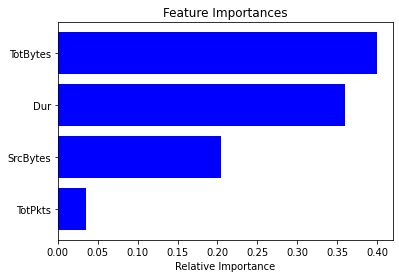

In [ ]:
# The two models that have TotBytes as the most important (with Dur and SrcBytes following) have performed the best thusfar

importances3 = classifier_3.feature_importances_
indices3 = np.argsort(importances3)

plt.title('Feature Importances')
plt.barh(range(len(indices3)), importances3[indices3], color='b', align='center')
plt.yticks(range(len(indices3)), [features[i] for i in indices3])
plt.xlabel('Relative Importance')
plt.show()

**Scenario 4 Model 1**

In [ ]:
scenario_4 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-45/detailed-bidirectional-flow-labels/capture20110815.binetflow')

In [ ]:
# Generate binary malicious target column
scenario_4.loc[scenario_4['SrcAddr'] == '147.32.84.165', 'Malicious'] = 1
scenario_4.loc[scenario_4['SrcAddr'] != '147.32.84.165', 'Malicious'] = 0

In [ ]:
# Checking to make sure that binary assignments worked
display(scenario_4.loc[scenario_4['SrcAddr'] == '147.32.84.165'])
display(scenario_4.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
996,2011/08/15 11:00:12.932584,30.359243,tcp,147.32.84.165,1089,->,208.73.210.29,80,SPA_FSRPA,0.0,0.0,11,2355,412,flow=From-Botnet-V45-TCP-Established-HTTP-Ad-15,1.0
247827,2011/08/15 11:57:16.094347,0.000427,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V45-UDP-DNS,1.0
247946,2011/08/15 11:57:18.344004,0.019812,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V45-UDP-DNS,1.0
247947,2011/08/15 11:57:18.365188,0.046706,tcp,147.32.84.165,1027,->,74.125.232.204,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V45-TCP-HTTP-Google-Net-Estab...,1.0
266111,2011/08/15 12:01:51.751806,0.000000,udp,147.32.84.165,137,->,192.168.88.121,33464,INT,0.0,NaN,1,104,104,flow=From-Botnet-V45-UDP-Attempt,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119452,2011/08/15 15:10:59.399724,9.012891,tcp,147.32.84.165,1329,->,218.223.68.52,25,S_,0.0,NaN,3,186,186,flow=From-Botnet-V45-TCP-Attempt-SPAM,1.0
1119453,2011/08/15 15:10:59.399778,9.012855,tcp,147.32.84.165,1335,->,24.71.223.11,25,S_,0.0,NaN,3,186,186,flow=From-Botnet-V45-TCP-Attempt-SPAM,1.0
1119454,2011/08/15 15:10:59.399832,9.012806,tcp,147.32.84.165,1346,->,210.138.174.72,25,S_,0.0,NaN,3,186,186,flow=From-Botnet-V45-TCP-Attempt-SPAM,1.0
1119455,2011/08/15 15:10:59.399886,9.012778,tcp,147.32.84.165,1348,->,74.125.39.27,25,S_,0.0,NaN,3,186,186,flow=From-Botnet-V45-TCP-Attempt-SPAM,1.0


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
0,2011/08/15 10:42:52.613616,1065.731934,udp,188.114.23.248,14268,<->,147.32.84.118,1150,CON,0.0,0.0,2,252,145,flow=Background-UDP-Established,0.0
1,2011/08/15 10:42:52.676517,1471.787109,udp,2.224.28.134,48279,<->,147.32.84.118,1150,CON,0.0,0.0,2,252,145,flow=Background-UDP-Established,0.0
2,2011/08/15 10:43:34.544316,1095.947266,udp,41.145.83.148,40812,<->,147.32.84.118,1150,CON,0.0,0.0,2,288,145,flow=Background-UDP-Established,0.0
3,2011/08/15 10:58:26.370803,2896.377197,udp,217.42.33.104,55066,<->,147.32.84.118,1150,CON,0.0,0.0,3,433,290,flow=Background-UDP-Established,0.0
4,2011/08/15 10:58:27.208147,1384.708008,udp,41.107.0.220,11066,<->,147.32.84.118,1150,CON,0.0,0.0,2,288,145,flow=Background-UDP-Established,0.0


In [ ]:
# Break data into target and features
y4 = scenario_4.Malicious
features = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes']
X4 = scenario_4[features].copy()

# Break data into training and testing data (80/20 split)
X4_train, X4_test, y4_train, y4_test, = train_test_split(X4,y4, train_size = 0.8, test_size = 0.2, random_state = 1)

In [ ]:
# Generate base model
classifier_4 = RandomForestClassifier(max_leaf_nodes = 100, random_state = 1)

# Fit model to training data
classifier_4.fit(X4_train,y4_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# Very high, still useless
predictions4 = classifier_4.predict(X4_test)

accuracy_score(y4_test, predictions4)

0.9984122453348557

In [ ]:
# Weakest f1 so far
f1_score(y4_test, predictions4)

0.4899713467048711

In [ ]:
# Relatively low number of true negatives, so the false negatives trend really hurts the f1 score here
labels4 = np.unique(y4_test)
cm4 = confusion_matrix(y4_test, predictions4, labels=labels4)
pd.DataFrame(cm4, index=labels4, columns=labels4)

,0.0,1.0
0.0,223689,27
1.0,329,171


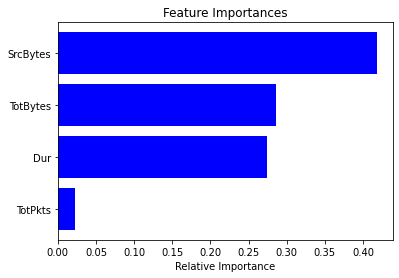

In [ ]:
# TotPkts consistently on bottom. Lower F1 score & TotBytes isn't the top predictor
importances4 = classifier_4.feature_importances_
indices4 = np.argsort(importances4)

plt.title('Feature Importances')
plt.barh(range(len(indices4)), importances4[indices4], color='b', align='center')
plt.yticks(range(len(indices4)), [features[i] for i in indices4])
plt.xlabel('Relative Importance')
plt.show()

**Scenario 5 Model 1**

In [ ]:
scenario_5 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-46/detailed-bidirectional-flow-labels/capture20110815-2.binetflow')

In [ ]:
# Generate binary malicious target column
scenario_5.loc[scenario_5['SrcAddr'] == '147.32.84.165', 'Malicious'] = 1
scenario_5.loc[scenario_5['SrcAddr'] != '147.32.84.165', 'Malicious'] = 0

In [ ]:
display(scenario_5.loc[scenario_5['SrcAddr'] == '147.32.84.165'])
display(scenario_5.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
45637,2011/08/15 16:52:50.947767,0.000130,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V46-UDP-DNS,1.0
45741,2011/08/15 16:52:53.201828,0.000452,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V46-UDP-DNS,1.0
45742,2011/08/15 16:52:53.203182,0.037394,tcp,147.32.84.165,1027,->,74.125.232.195,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V46-TCP-HTTP-Google-Net-Estab...,1.0
48870,2011/08/15 16:53:42.316319,0.054648,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,226,71,flow=From-Botnet-V46-UDP-DNS,1.0
48879,2011/08/15 16:53:42.371928,1139.728638,tcp,147.32.84.165,1038,->,94.63.149.150,80,SPA_SPA,0.0,0.0,48,3584,1169,flow=From-Botnet-V46-TCP-WEB-Established,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127960,2011/08/15 17:12:52.581592,1.008225,tcp,147.32.84.165,2240,->,46.4.36.120,443,S_RA,0.0,0.0,6,366,186,flow=From-Botnet-V46-TCP-Attempt,1.0
128021,2011/08/15 17:12:53.673162,0.022795,tcp,147.32.84.165,2242,->,212.117.171.138,65500,SA_SA,0.0,0.0,3,184,122,flow=From-Botnet-V46-TCP-Not-Encrypted-SMTP-Pr...,1.0
128029,2011/08/15 17:12:53.817294,0.184262,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,294,72,flow=From-Botnet-V46-UDP-DNS,1.0
128037,2011/08/15 17:12:54.002371,31.425388,tcp,147.32.84.165,2243,->,64.12.175.136,587,SPA_FSPA,0.0,0.0,14,2752,195,flow=From-Botnet-V46-TCP-Established-SPAM,1.0


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
0,2011/08/15 16:43:20.931208,1783.916870,tcp,147.32.84.59,64131,<?>,164.8.32.159,54992,PA_PA,0.0,0.0,293,32160,20485,flow=Background-Established-cmpgw-CVUT,0.0
1,2011/08/15 16:43:20.933428,0.444453,tcp,147.32.87.252,49218,<?>,147.32.80.13,3128,FPA_FPA,0.0,0.0,879,747909,19566,flow=To-Background-CVUT-Proxy,0.0
2,2011/08/15 16:43:20.933441,1804.837158,tcp,41.143.58.184,1328,<?>,147.32.86.179,58675,PA_PA,0.0,0.0,9547,942226,580940,flow=Background,0.0
3,2011/08/15 16:43:20.933541,0.187604,tcp,147.32.86.155,51273,<?>,204.154.94.81,80,FA_FA,0.0,0.0,3,198,132,flow=Background,0.0
4,2011/08/15 16:43:20.933942,1804.610718,tcp,147.32.86.179,58675,<?>,151.42.234.124,50001,PA_PA,0.0,0.0,29890,3689108,917036,flow=Background,0.0


In [ ]:
# Break data into target and features
y5 = scenario_5.Malicious
features = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes']
X5 = scenario_5[features].copy()

# Break data into training and testing data (80/20 split)
X5_train, X5_test, y5_train, y5_test, = train_test_split(X5,y5, train_size = 0.8, test_size = 0.2, random_state = 1)

In [ ]:
# Generate base model
classifier_5 = RandomForestClassifier(max_leaf_nodes = 100, random_state = 1)

# Fit model to training data
classifier_5.fit(X5_train,y5_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# Very high
predictions5 = classifier_5.predict(X5_test)

accuracy_score(y5_test, predictions5)

0.9963029999614896

In [ ]:
# About the same as scenario 1
f1_score(y5_test, predictions5)

0.616

In [ ]:
# Very few malicious IPs in this set
labels5 = np.unique(y5_test)
cm5 = confusion_matrix(y5_test, predictions5, labels=labels5)
pd.DataFrame(cm5, index=labels5, columns=labels5)

,0.0,1.0
0.0,25794,14
1.0,82,77


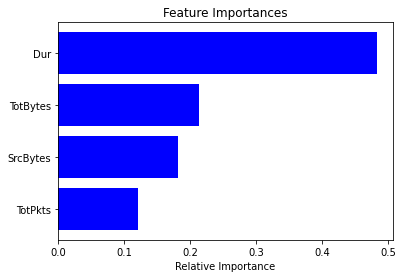

In [ ]:
importances5 = classifier_5.feature_importances_
indices5 = np.argsort(importances5)

plt.title('Feature Importances')
plt.barh(range(len(indices5)), importances5[indices5], color='b', align='center')
plt.yticks(range(len(indices5)), [features[i] for i in indices5])
plt.xlabel('Relative Importance')
plt.show()

**Scenario 6 Model 1**

In [ ]:
scenario_6 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-47/detailed-bidirectional-flow-labels/capture20110816.binetflow')

In [ ]:
# Generate binary malicious target column
scenario_6.loc[scenario_6['SrcAddr'] == '147.32.84.165', 'Malicious'] = 1
scenario_6.loc[scenario_6['SrcAddr'] != '147.32.84.165', 'Malicious'] = 0

In [ ]:
display(scenario_6.loc[scenario_6['SrcAddr'] == '147.32.84.165'])
display(scenario_6.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
2884,2011/08/16 10:02:08.703460,0.167688,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,505,78,flow=From-Botnet-V47-UDP-DNS,1.0
2910,2011/08/16 10:02:08.872739,500.003357,tcp,147.32.84.165,1039,->,195.113.232.73,80,SPA_FSPA,0.0,0.0,14,5498,531,flow=From-Botnet-V47-TCP-Established-HTTP-Ad-4,1.0
39057,2011/08/16 10:09:58.055700,1.896288,tcp,147.32.84.165,1040,->,91.212.135.158,5678,FSPA_FSPA,0.0,0.0,1417,1255401,32823,flow=From-Botnet-V47-TCP-CC73-Not-Encrypted,1.0
39180,2011/08/16 10:09:59.890489,0.147772,udp,147.32.84.165,1041,<->,147.32.80.9,53,CON,0.0,0.0,2,229,88,flow=From-Botnet-V47-UDP-DNS,1.0
39195,2011/08/16 10:10:00.039348,0.000391,udp,147.32.84.165,1042,<->,147.32.80.9,53,CON,0.0,0.0,2,326,86,flow=From-Botnet-V47-UDP-DNS,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554753,2011/08/16 12:10:08.795607,2.942743,tcp,147.32.84.165,4856,->,220.225.80.179,25,S_,0.0,NaN,2,124,124,flow=From-Botnet-V47-TCP-Attempt-SPAM,1.0
554754,2011/08/16 12:10:08.795910,2.942500,tcp,147.32.84.165,4857,->,67.231.152.94,25,S_,0.0,NaN,2,124,124,flow=From-Botnet-V47-TCP-Attempt-SPAM,1.0
554755,2011/08/16 12:10:08.796217,2.942256,tcp,147.32.84.165,4858,->,24.71.223.11,25,S_,0.0,NaN,2,124,124,flow=From-Botnet-V47-TCP-Attempt-SPAM,1.0
554756,2011/08/16 12:10:08.796508,2.942027,tcp,147.32.84.165,4859,->,89.6.186.79,25,S_,0.0,NaN,2,124,124,flow=From-Botnet-V47-TCP-Attempt-SPAM,1.0


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
0,2011/08/16 10:01:46.972101,3599.986572,tcp,88.176.79.163,49213,<?>,147.32.84.172,18250,A_PA,0.0,0.0,414671,415389446,10150692,flow=Background,0.0
1,2011/08/16 10:01:46.974947,320.268677,tcp,147.32.85.112,22,<?>,85.70.14.207,10005,FPA_FPA,0.0,0.0,31989,7744510,6056438,flow=Background,0.0
2,2011/08/16 10:01:46.976831,0.000467,udp,90.178.10.8,61997,<->,147.32.84.229,13363,CON,0.0,0.0,2,236,174,flow=Background-UDP-Established,0.0
3,2011/08/16 10:01:46.977232,0.009599,tcp,117.211.100.130,43458,?>,147.32.86.92,80,RA_,0.0,NaN,4,264,264,flow=Background,0.0
4,2011/08/16 10:01:46.979356,3599.942383,tcp,88.176.79.163,49375,<?>,147.32.84.172,46696,A_PA,0.0,0.0,471746,473057124,11502112,flow=Background,0.0


In [ ]:
# Break data into target and features
y6 = scenario_6.Malicious
features = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes']
X6 = scenario_6[features].copy()

# Break data into training and testing data (80/20 split)
X6_train, X6_test, y6_train, y6_test, = train_test_split(X6,y6, train_size = 0.8, test_size = 0.2, random_state = 1)

In [ ]:
# Generate base model
classifier_6 = RandomForestClassifier(max_leaf_nodes = 100, random_state = 1)

# Fit model to training data
classifier_6.fit(X6_train,y6_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
predictions6 = classifier_6.predict(X6_test)

accuracy_score(y6_test, predictions6)

0.999150146711515

In [ ]:
# Very high
f1_score(y6_test, predictions6)

0.9467787114845938

In [ ]:
labels6 = np.unique(y6_test)
cm6 = confusion_matrix(y6_test, predictions6, labels=labels6)
pd.DataFrame(cm6, index=labels6, columns=labels6)

,0.0,1.0
0.0,110844,76
1.0,19,845


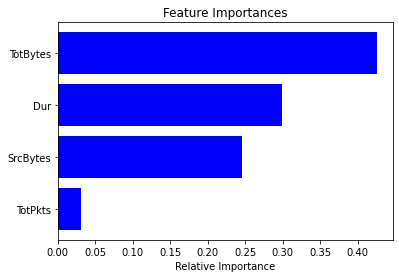

In [ ]:
importances6 = classifier_6.feature_importances_
indices6 = np.argsort(importances6)

plt.title('Feature Importances')
plt.barh(range(len(indices6)), importances6[indices6], color='b', align='center')
plt.yticks(range(len(indices6)), [features[i] for i in indices6])
plt.xlabel('Relative Importance')
plt.show()

**Scenario 7 Model 1**

In [ ]:
scenario_7 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-48/detailed-bidirectional-flow-labels/capture20110816-2.binetflow')

In [ ]:
# Generate binary malicious target column
scenario_7.loc[scenario_7['SrcAddr'] == '147.32.84.165', 'Malicious'] = 1
scenario_7.loc[scenario_7['SrcAddr'] != '147.32.84.165', 'Malicious'] = 0

In [ ]:
display(scenario_7.loc[scenario_7['SrcAddr'] == '147.32.84.165'])
display(scenario_7.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
14659,2011/08/16 13:53:16.575831,0.000274,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V48-UDP-DNS,1.0
14888,2011/08/16 13:53:18.829314,0.010509,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V48-UDP-DNS,1.0
14892,2011/08/16 13:53:18.840760,0.054527,tcp,147.32.84.165,1027,->,74.125.232.201,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V48-TCP-HTTP-Google-Net-Estab...,1.0
15090,2011/08/16 13:53:21.628190,0.000502,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,479,76,flow=From-Botnet-V48-UDP-DNS,1.0
15092,2011/08/16 13:53:21.631994,2.995112,udp,147.32.84.165,123,->,65.55.56.40,123,INT,0.0,NaN,2,180,180,flow=From-Botnet-V48-UDP-Attempt,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49653,2011/08/16 13:59:55.964681,63.990128,tcp,147.32.84.165,1077,->,123.126.51.33,80,SRPA_SPA,0.0,0.0,9,3505,857,flow=From-Botnet-V48-TCP-CC108-Plain-HTTP,1.0
49654,2011/08/16 13:59:55.964936,63.990356,tcp,147.32.84.165,1078,->,123.126.51.33,80,SRPA_SPA,0.0,0.0,11,4280,920,flow=From-Botnet-V48-TCP-CC108-Plain-HTTP,1.0
49655,2011/08/16 13:59:55.965166,63.989796,tcp,147.32.84.165,1079,->,123.126.51.33,80,SRPA_SPA,0.0,0.0,9,3896,852,flow=From-Botnet-V48-TCP-CC108-Plain-HTTP,1.0
49656,2011/08/16 13:59:55.965402,63.990089,tcp,147.32.84.165,1080,->,123.126.51.33,80,SRPA_SPA,0.0,0.0,8,1469,863,flow=From-Botnet-V48-TCP-CC108-Plain-HTTP,1.0


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
0,2011/08/16 13:51:24.049047,1277.465088,udp,147.32.84.59,7525,<->,213.239.192.34,50012,CON,0.0,0.0,1606,1508937,1245441,flow=Background-Established-cmpgw-CVUT,0.0
1,2011/08/16 13:51:24.049051,1200.943726,udp,147.32.84.59,7525,<->,188.40.100.105,50012,CON,0.0,0.0,1240,992275,425194,flow=Background-Established-cmpgw-CVUT,0.0
2,2011/08/16 13:51:24.049832,1276.750610,tcp,80.98.130.52,51686,<?>,147.32.84.229,13363,PA_PA,0.0,0.0,112,12484,8482,flow=Background,0.0
3,2011/08/16 13:51:24.049954,1190.095215,udp,147.32.84.59,7525,<->,78.46.38.219,55012,CON,0.0,0.0,1841,1692037,1429143,flow=Background-Established-cmpgw-CVUT,0.0
4,2011/08/16 13:51:24.050042,1257.621094,udp,147.32.84.59,7525,<->,213.239.199.195,51012,CON,0.0,0.0,1890,1782878,1324527,flow=Background-Established-cmpgw-CVUT,0.0


In [ ]:
# Break data into target and features
y7 = scenario_7.Malicious
features = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes']
X7 = scenario_7[features].copy()

# Break data into training and testing data (80/20 split)
X7_train, X7_test, y7_train, y7_test, = train_test_split(X7,y7, train_size = 0.8, test_size = 0.2, random_state = 1)

In [ ]:
# Generate base model
classifier_7 = RandomForestClassifier(max_leaf_nodes = 100, random_state = 1)

# Fit model to training data
classifier_7.fit(X7_train,y7_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
predictions7 = classifier_7.predict(X7_test)

accuracy_score(y7_test, predictions7)

0.999430224403927

In [ ]:
# Very low
f1_score(y7_test, predictions7)

0.13333333333333336

In [ ]:
# There were only 126 bidirectional maliciouss flows in scenario 7, meaning there were 63 sourced from the malicious IP, and somehow only 2 appeared in the test set. 
# I re-ran this model using a 60/40 train/test split, but it actually hurts the F1 performance. This is a candidate for five fold cross validation.
labels7 = np.unique(y7_test)
cm7 = confusion_matrix(y7_test, predictions7, labels=labels7)
pd.DataFrame(cm7, index=labels7, columns=labels7)

,0.0,1.0
0.0,22802,1
1.0,12,1


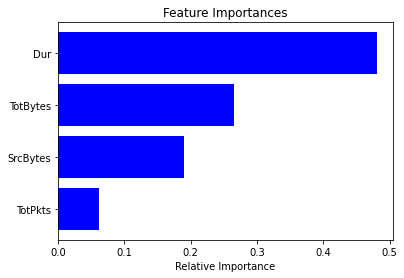

In [ ]:
importances7 = classifier_7.feature_importances_
indices7 = np.argsort(importances7)

plt.title('Feature Importances')
plt.barh(range(len(indices7)), importances7[indices7], color='b', align='center')
plt.yticks(range(len(indices7)), [features[i] for i in indices7])
plt.xlabel('Relative Importance')
plt.show()

**Scenario 8 Model 1**

In [ ]:
scenario_8 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-49/detailed-bidirectional-flow-labels/capture20110816-3.binetflow')

In [ ]:
# Generate binary malicious target column
scenario_8.loc[scenario_8['SrcAddr'] == '147.32.84.165', 'Malicious'] = 1
scenario_8.loc[scenario_8['SrcAddr'] != '147.32.84.165', 'Malicious'] = 0

In [ ]:
display(scenario_8.loc[scenario_8['SrcAddr'] == '147.32.84.165'])
display(scenario_8.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
923,2011/08/16 14:19:01.438016,1.000221,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,4,1010,156,flow=From-Botnet-V49-UDP-DNS,1.0
1103,2011/08/16 14:19:02.439762,500.002869,tcp,147.32.84.165,1039,->,195.113.232.98,80,SRPA_FSPA,0.0,0.0,14,5498,531,flow=From-Botnet-V49-TCP-Established-HTTP-Ad-40,1.0
8354,2011/08/16 14:20:00.257453,0.000218,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V49-UDP-DNS,1.0
8611,2011/08/16 14:20:02.506566,0.000513,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V49-UDP-DNS,1.0
8612,2011/08/16 14:20:02.508142,0.037986,tcp,147.32.84.165,1027,->,74.125.232.193,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V49-TCP-HTTP-Google-Net-Estab...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939820,2011/08/17 09:42:39.426884,60.938206,tcp,147.32.84.165,3926,->,222.189.228.111,3389,FSPA_FSPA,0.0,0.0,10,1076,437,flow=From-Botnet-V49-TCP-CC74-HTTP-Custom-Port...,1.0
2943656,2011/08/17 09:43:40.053643,60.953976,tcp,147.32.84.165,3927,->,222.189.228.111,3389,FSPA_FSPA,0.0,0.0,10,1076,437,flow=From-Botnet-V49-TCP-CC74-HTTP-Custom-Port...,1.0
2946760,2011/08/17 09:44:40.690657,60.939800,tcp,147.32.84.165,3928,->,222.189.228.111,3389,FSPA_FSPA,0.0,0.0,10,1076,437,flow=From-Botnet-V49-TCP-CC74-HTTP-Custom-Port...,1.0
2949639,2011/08/17 09:45:41.318934,60.939594,tcp,147.32.84.165,3929,->,222.189.228.111,3389,FSPA_FSPA,0.0,0.0,10,1076,437,flow=From-Botnet-V49-TCP-CC74-HTTP-Custom-Port...,1.0


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
0,2011/08/16 14:18:55.889839,3599.725830,tcp,88.176.79.163,49375,<?>,147.32.84.172,46696,A_PA,0.0,0.0,274708,271837036,6887036,flow=Background,0.0
1,2011/08/16 14:18:55.890497,3532.512939,tcp,134.2.99.108,12106,<?>,147.32.84.59,51472,PA_PA,0.0,0.0,513,42640,21205,flow=Background-Established-cmpgw-CVUT,0.0
2,2011/08/16 14:18:55.892530,3599.922852,udp,109.80.124.147,10227,<->,147.32.86.77,43332,CON,0.0,0.0,69490,14362350,11870607,flow=Background-UDP-Established,0.0
3,2011/08/16 14:18:55.892624,82.457962,tcp,147.32.84.59,34394,<?>,74.125.39.117,80,FPA_FPA,0.0,0.0,12526,8472421,8118714,flow=Background-Established-cmpgw-CVUT,0.0
4,2011/08/16 14:18:55.894121,3599.954346,tcp,88.176.79.163,49410,<?>,147.32.84.172,52935,A_PA,0.0,0.0,285606,281932488,7230814,flow=Background,0.0


In [ ]:
# Break data into target and features
y8 = scenario_8.Malicious
features = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes']
X8 = scenario_8[features].copy()

# Break data into training and testing data (80/20 split)
X8_train, X8_test, y8_train, y8_test, = train_test_split(X8,y8, train_size = 0.8, test_size = 0.2, random_state = 1)

In [ ]:
# Generate base model
classifier_8 = RandomForestClassifier(max_leaf_nodes = 100, random_state = 1)

# Fit model to training data
classifier_8.fit(X8_train,y8_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
predictions8 = classifier_8.predict(X8_test)

accuracy_score(y8_test, predictions8)

0.9983362839047738

In [ ]:
f1_score(y8_test, predictions8)

0.2953405017921147

In [ ]:
# This really underscores the false negatives issue that this particular model has, but 0 false negatives is relatively impressive. 
labels8 = np.unique(y8_test)
cm8 = confusion_matrix(y8_test, predictions8, labels=labels8)
pd.DataFrame(cm8, index=labels8, columns=labels8)

,0.0,1.0
0.0,589657,0
1.0,983,206


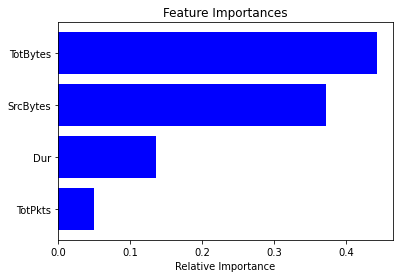

In [ ]:
importances8 = classifier_8.feature_importances_
indices8 = np.argsort(importances8)

plt.title('Feature Importances')
plt.barh(range(len(indices8)), importances8[indices8], color='b', align='center')
plt.yticks(range(len(indices8)), [features[i] for i in indices8])
plt.xlabel('Relative Importance')
plt.show()

**Scenario 9 Model 1**

In [ ]:
scenario_9 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-50/detailed-bidirectional-flow-labels/capture20110817.binetflow')

In [ ]:
# Generate binary malicious target column
scenario_9.loc[scenario_9['SrcAddr'] == '147.32.84.165', 'Malicious'] = 1
scenario_9.loc[scenario_9['SrcAddr'] == '147.32.84.191', 'Malicious'] = 1
scenario_9.loc[scenario_9['SrcAddr'] == '147.32.84.192', 'Malicious'] = 1
scenario_9.loc[scenario_9['SrcAddr'] == '147.32.84.193', 'Malicious'] = 1
scenario_9.loc[scenario_9['SrcAddr'] == '147.32.84.204', 'Malicious'] = 1
scenario_9.loc[scenario_9['SrcAddr'] == '147.32.84.205', 'Malicious'] = 1
scenario_9.loc[scenario_9['SrcAddr'] == '147.32.84.206', 'Malicious'] = 1
scenario_9.loc[scenario_9['SrcAddr'] == '147.32.84.207', 'Malicious'] = 1
scenario_9.loc[scenario_9['SrcAddr'] == '147.32.84.208', 'Malicious'] = 1
scenario_9.loc[scenario_9['SrcAddr'] == '147.32.84.209', 'Malicious'] = 1
scenario_9.loc[scenario_9['Malicious'] != 1, 'Malicious'] = 0

In [ ]:
display(scenario_9.loc[scenario_9['SrcAddr'] == '147.32.84.165'])
display(scenario_9.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
153064,2011/08/17 12:28:41.718300,0.000304,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V50-1-UDP-DNS,1.0
153205,2011/08/17 12:28:43.968847,0.000442,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V50-1-UDP-DNS,1.0
153206,2011/08/17 12:28:43.970043,0.038260,tcp,147.32.84.165,1027,->,74.125.232.194,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V50-1-TCP-HTTP-Google-Net-Est...,1.0
153428,2011/08/17 12:28:46.979674,0.000527,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,479,76,flow=From-Botnet-V50-1-UDP-DNS,1.0
153429,2011/08/17 12:28:46.982548,3.009216,udp,147.32.84.165,123,->,65.55.56.40,123,INT,0.0,NaN,2,180,180,flow=From-Botnet-V50-1-UDP-Attempt,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062362,2011/08/17 17:07:12.103937,0.148172,udp,147.32.84.165,1536,<->,147.32.80.9,53,CON,0.0,0.0,2,342,68,flow=From-Botnet-V50-1-UDP-DNS,1.0
2062382,2011/08/17 17:07:12.252758,0.020216,udp,147.32.84.165,1536,<->,147.32.80.9,53,CON,0.0,0.0,2,337,83,flow=From-Botnet-V50-1-UDP-DNS,1.0
2062443,2011/08/17 17:07:12.644399,0.186972,tcp,147.32.84.165,2319,->,217.163.21.35,80,FSPA_FSPA,0.0,0.0,14,5874,785,flow=From-Botnet-V50-1-TCP-Established-HTTP-Ad...,1.0
2062458,2011/08/17 17:07:12.690204,0.000000,tcp,147.32.84.165,2318,->,208.87.234.190,25,S_,0.0,NaN,1,62,62,flow=From-Botnet-V50-1-TCP-Attempt-SPAM,1.0


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
0,2011/08/17 11:34:49.436881,1823.088379,udp,46.196.43.16,6881,<->,147.32.84.118,6881,CON,0.0,0.0,2,214,107,flow=Background-UDP-Established,0.0
1,2011/08/17 11:39:01.485380,2005.431641,udp,82.1.195.156,6881,<->,147.32.84.118,6881,CON,0.0,0.0,2,214,107,flow=Background-UDP-Established,0.0
2,2011/08/17 11:40:19.495285,1973.646729,udp,151.28.221.122,6881,<->,147.32.84.118,6881,CON,0.0,0.0,2,214,107,flow=Background-UDP-Established,0.0
3,2011/08/17 12:01:01.780520,3599.997803,udp,188.75.133.98,16200,<->,147.32.86.125,35248,CON,0.0,0.0,409227,207547419,182657149,flow=Background-UDP-Established,0.0
4,2011/08/17 12:01:01.782109,2059.387451,tcp,119.252.172.92,59067,<?>,147.32.84.14,80,RA_PA,0.0,0.0,224275,266462578,3199174,flow=Background,0.0


In [ ]:
# Break data into target and features
y9 = scenario_9.Malicious
features = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes']
X9 = scenario_9[features].copy()

# Break data into training and testing data (80/20 split)
X9_train, X9_test, y9_train, y9_test, = train_test_split(X9,y9, train_size = 0.8, test_size = 0.2, random_state = 1)

In [ ]:
# Generate base model
classifier_9 = RandomForestClassifier(max_leaf_nodes = 100, random_state = 1)

# Fit model to training data
classifier_9.fit(X9_train,y9_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# Slightly lower..larger data set?
predictions9 = classifier_9.predict(X9_test)

accuracy_score(y9_test, predictions9)

0.9580313387720298

In [ ]:
f1_score(y9_test, predictions9)

0.7465868332754829

In [ ]:
labels9 = np.unique(y9_test)
cm9 = confusion_matrix(y9_test, predictions9, labels=labels9)
pd.DataFrame(cm9, index=labels9, columns=labels9)

,0.0,1.0
0.0,374169,6469
1.0,11053,25811


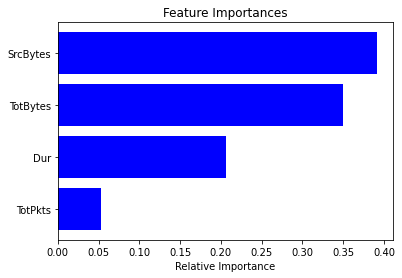

In [ ]:
importances9 = classifier_9.feature_importances_
indices9 = np.argsort(importances9)

plt.title('Feature Importances')
plt.barh(range(len(indices9)), importances9[indices9], color='b', align='center')
plt.yticks(range(len(indices9)), [features[i] for i in indices9])
plt.xlabel('Relative Importance')
plt.show()

**Scenario 10 Model 1**

In [ ]:
scenario_10 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-51/detailed-bidirectional-flow-labels/capture20110818.binetflow')

In [ ]:
# Generate binary malicious target column
scenario_10.loc[scenario_10['SrcAddr'] == '147.32.84.165', 'Malicious'] = 1
scenario_10.loc[scenario_10['SrcAddr'] == '147.32.84.191', 'Malicious'] = 1
scenario_10.loc[scenario_10['SrcAddr'] == '147.32.84.192', 'Malicious'] = 1
scenario_10.loc[scenario_10['SrcAddr'] == '147.32.84.193', 'Malicious'] = 1
scenario_10.loc[scenario_10['SrcAddr'] == '147.32.84.204', 'Malicious'] = 1
scenario_10.loc[scenario_10['SrcAddr'] == '147.32.84.205', 'Malicious'] = 1
scenario_10.loc[scenario_10['SrcAddr'] == '147.32.84.206', 'Malicious'] = 1
scenario_10.loc[scenario_10['SrcAddr'] == '147.32.84.207', 'Malicious'] = 1
scenario_10.loc[scenario_10['SrcAddr'] == '147.32.84.208', 'Malicious'] = 1
scenario_10.loc[scenario_10['SrcAddr'] == '147.32.84.209', 'Malicious'] = 1
scenario_10.loc[scenario_10['Malicious'] != 1, 'Malicious'] = 0

In [ ]:
display(scenario_10.loc[scenario_10['SrcAddr'] == '147.32.84.165'])
display(scenario_10.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
90529,2011/08/18 10:37:58.448307,0.000342,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V51-1-UDP-DNS,1.0
90715,2011/08/18 10:38:00.695278,0.010278,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V51-1-UDP-DNS,1.0
90716,2011/08/18 10:38:00.706560,0.043726,tcp,147.32.84.165,1027,->,74.125.232.206,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V51-1-TCP-HTTP-Google-Net-Est...,1.0
90872,2011/08/18 10:38:03.255934,0.010256,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,479,76,flow=From-Botnet-V51-1-UDP-DNS,1.0
90875,2011/08/18 10:38:03.267222,581.516663,udp,147.32.84.165,123,->,65.55.56.40,123,INT,0.0,NaN,4,360,360,flow=From-Botnet-V51-1-UDP-Attempt,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307058,2011/08/18 15:04:54.330378,0.000000,icmp,147.32.84.165,0x3c70,->,147.32.96.69,NaN,UNK,0.0,NaN,1,1066,1066,flow=From-Botnet-V51-1-ICMP,1.0
1307061,2011/08/18 15:04:54.337226,0.000000,icmp,147.32.84.165,0xb4de,->,147.32.96.69,NaN,UNK,0.0,NaN,1,1066,1066,flow=From-Botnet-V51-1-ICMP,1.0
1307062,2011/08/18 15:04:54.338097,0.000000,icmp,147.32.84.165,0x6d8d,->,147.32.96.69,NaN,UNK,0.0,NaN,1,1066,1066,flow=From-Botnet-V51-1-ICMP,1.0
1307071,2011/08/18 15:04:54.349368,0.037603,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,555,76,flow=From-Botnet-V51-1-UDP-DNS,1.0


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
0,2011/08/18 09:56:29.146156,2752.656250,udp,71.222.124.71,60621,<->,147.32.84.59,63550,CON,0.0,0.0,3,435,290,flow=Background-Established-cmpgw-CVUT,0.0
1,2011/08/18 09:56:42.630892,1849.315552,udp,78.234.54.245,51413,<->,147.32.84.59,63550,CON,0.0,0.0,3,417,272,flow=Background-Established-cmpgw-CVUT,0.0
2,2011/08/18 09:56:44.640650,2091.747314,udp,31.147.120.139,63195,<->,147.32.84.59,63550,CON,0.0,0.0,2,290,145,flow=Background-Established-cmpgw-CVUT,0.0
3,2011/08/18 10:10:52.782230,1535.769409,udp,118.5.35.64,39110,<->,147.32.84.59,63550,CON,0.0,0.0,2,290,145,flow=Background-Established-cmpgw-CVUT,0.0
4,2011/08/18 10:19:13.328372,0.002636,tcp,147.32.86.166,33426,<?>,212.24.150.110,25443,FRPA_FPA,0.0,0.0,6,490,321,flow=Background,0.0


In [ ]:
# Break data into target and features
y10 = scenario_10.Malicious
features = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes']
X10 = scenario_10[features].copy()

# Break data into training and testing data (80/20 split)
X10_train, X10_test, y10_train, y10_test, = train_test_split(X10,y10, train_size = 0.8, test_size = 0.2, random_state = 1)

In [ ]:
# Generate base model
classifier_10 = RandomForestClassifier(max_leaf_nodes = 100, random_state = 1)

# Fit model to training data
classifier_10.fit(X10_train,y10_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
predictions10 = classifier_10.predict(X10_test)

accuracy_score(y10_test, predictions10)

0.999751869567375

In [ ]:
# Incredibly high...suspiciously high
f1_score(y10_test, predictions10)

0.9984872111155072

In [ ]:
labels10 = np.unique(y10_test)
cm10 = confusion_matrix(y10_test, predictions10, labels=labels10)
pd.DataFrame(cm10, index=labels10, columns=labels10)

,0.0,1.0
0.0,240443,4
1.0,61,21451


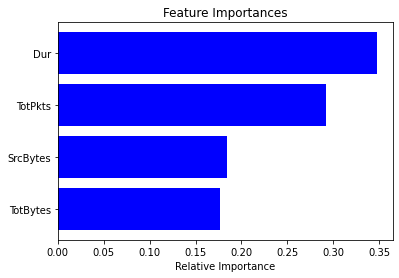

In [ ]:
importances10 = classifier_10.feature_importances_
indices10 = np.argsort(importances10)

plt.title('Feature Importances')
plt.barh(range(len(indices10)), importances10[indices10], color='b', align='center')
plt.yticks(range(len(indices10)), [features[i] for i in indices10])
plt.xlabel('Relative Importance')
plt.show()

**Scenario 11 Model 1**

In [ ]:
scenario_11 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-52/detailed-bidirectional-flow-labels/capture20110818-2.binetflow')

In [ ]:
# Generate binary malicious target column
scenario_11.loc[scenario_11['SrcAddr'] == '147.32.84.165', 'Malicious'] = 1
scenario_11.loc[scenario_11['SrcAddr'] == '147.32.84.191', 'Malicious'] = 1
scenario_11.loc[scenario_11['SrcAddr'] == '147.32.84.192', 'Malicious'] = 1
scenario_11.loc[scenario_11['Malicious'] != 1, 'Malicious'] = 0

In [ ]:
display(scenario_11.loc[scenario_11['SrcAddr'] == '147.32.84.165'])
display(scenario_11.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
53987,2011/08/18 15:47:57.983212,0.000197,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V52-1-UDP-DNS,1.0
54222,2011/08/18 15:48:00.231242,0.020501,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V52-1-UDP-DNS,1.0
54225,2011/08/18 15:48:00.252763,0.036866,tcp,147.32.84.165,1027,->,74.125.232.201,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V52-1-TCP-HTTP-Google-Net-Est...,1.0
54485,2011/08/18 15:48:02.467929,0.000668,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,479,76,flow=From-Botnet-V52-1-UDP-DNS,1.0
54486,2011/08/18 15:48:02.477619,3.012514,udp,147.32.84.165,123,->,65.55.56.40,123,INT,0.0,NaN,2,180,180,flow=From-Botnet-V52-1-UDP-Attempt,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,2011/08/18 15:54:55.589358,0.000000,icmp,147.32.84.165,0x75a4,->,147.32.96.69,NaN,UNK,0.0,NaN,1,1066,1066,flow=From-Botnet-V52-1-ICMP,1.0
102054,2011/08/18 15:54:55.589534,0.000000,icmp,147.32.84.165,0xf88e,->,147.32.96.69,NaN,UNK,0.0,NaN,1,1066,1066,flow=From-Botnet-V52-1-ICMP,1.0
102055,2011/08/18 15:54:55.591005,0.000000,icmp,147.32.84.165,0x903f,->,147.32.96.69,NaN,UNK,0.0,NaN,1,1066,1066,flow=From-Botnet-V52-1-ICMP,1.0
102057,2011/08/18 15:54:55.591947,0.000000,icmp,147.32.84.165,0x0744,->,147.32.96.69,NaN,UNK,0.0,NaN,1,1066,1066,flow=From-Botnet-V52-1-ICMP,1.0


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
0,2011/08/18 15:39:35.087798,83.062141,tcp,147.32.84.202,1078,<?>,65.54.89.106,80,RPA_FPA,0.0,0.0,43065,40974671,1033777,flow=Background,0.0
1,2011/08/18 15:39:35.087915,497.720459,tcp,88.100.184.137,13121,<?>,147.32.85.26,62860,RPA_PA,0.0,0.0,326962,132430976,7076046,flow=Background,0.0
2,2011/08/18 15:39:35.091007,971.288147,tcp,147.32.84.2,80,<?>,218.75.208.58,3088,PA_A,0.0,0.0,7912,7356876,7153650,flow=Background,0.0
3,2011/08/18 15:39:35.091585,899.996399,tcp,90.181.84.58,54518,<?>,147.32.84.19,993,PA_PA,0.0,0.0,48,5728,3008,flow=Background,0.0
4,2011/08/18 15:39:35.093493,38.753445,tcp,147.32.86.116,19083,?>,151.82.9.107,2185,RPA_,0.0,NaN,7,456,456,flow=Background,0.0


In [ ]:
# Break data into target and features
y11 = scenario_11.Malicious
features = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes']
X11 = scenario_11[features].copy()

# Break data into training and testing data (80/20 split)
X11_train, X11_test, y11_train, y11_test, = train_test_split(X11,y11, train_size = 0.8, test_size = 0.2, random_state = 1)

In [ ]:
# Generate base model
classifier_11 = RandomForestClassifier(max_leaf_nodes = 100, random_state = 1)

# Fit model to training data
classifier_11.fit(X11_train,y11_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
predictions11 = classifier_11.predict(X11_test)

accuracy_score(y11_test, predictions11)

0.9998135285068295

In [ ]:
# Incredibly high...suspiciously high
f1_score(y11_test, predictions11)

0.9987460815047023

In [ ]:
labels11 = np.unique(y11_test)
cm11 = confusion_matrix(y11_test, predictions11, labels=labels11)
pd.DataFrame(cm11, index=labels11, columns=labels11)

,0.0,1.0
0.0,19854,1
1.0,3,1593


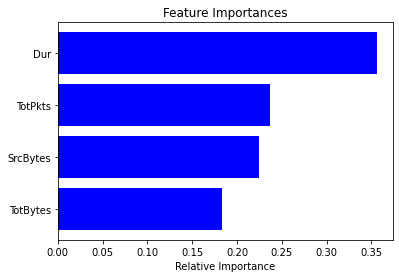

In [ ]:
importances11 = classifier_11.feature_importances_
indices11 = np.argsort(importances11)

plt.title('Feature Importances')
plt.barh(range(len(indices11)), importances11[indices11], color='b', align='center')
plt.yticks(range(len(indices11)), [features[i] for i in indices11])
plt.xlabel('Relative Importance')
plt.show()

**Scenario 12 Model 1**

In [ ]:
scenario_12 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-53/detailed-bidirectional-flow-labels/capture20110819.binetflow')

In [ ]:
# Generate binary malicious target column
scenario_12.loc[scenario_12['SrcAddr'] == '147.32.84.165', 'Malicious'] = 1
scenario_12.loc[scenario_12['SrcAddr'] == '147.32.84.191', 'Malicious'] = 1
scenario_12.loc[scenario_12['SrcAddr'] == '147.32.84.192', 'Malicious'] = 1
scenario_12.loc[scenario_12['Malicious'] != 1, 'Malicious'] = 0

In [ ]:
display(scenario_12.loc[scenario_12['SrcAddr'] == '147.32.84.165'])
display(scenario_12.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
55309,2011/08/19 10:42:24.940312,0.000222,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V53-1-UDP-DNS,1.0
55483,2011/08/19 10:42:27.233797,0.010105,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V53-1-UDP-DNS,1.0
55484,2011/08/19 10:42:27.245200,0.086917,tcp,147.32.84.165,1027,->,74.125.232.130,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V53-1-TCP-HTTP-Google-Net-Est...,1.0
55485,2011/08/19 10:42:27.374312,0.000417,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,358,76,flow=From-Botnet-V53-1-UDP-DNS,1.0
55486,2011/08/19 10:42:27.375722,40.477837,tcp,147.32.84.165,1029,->,74.125.79.100,80,SRPA_SPA,0.0,0.0,10,3065,1587,flow=From-Botnet-V53-1-TCP-HTTP-Google-Net-Est...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320654,2011/08/19 11:44:28.704361,0.000000,udp,147.32.84.165,1140,->,221.123.176.73,8000,REQ,0.0,0.0,1,198,198,flow=From-Botnet-V53-1-UDP-Attempt,1.0
320669,2011/08/19 11:44:28.993767,0.170053,udp,147.32.84.165,32234,<->,77.198.89.70,23872,CON,0.0,0.0,2,485,340,flow=From-Botnet-V53-1-UDP-Established,1.0
320754,2011/08/19 11:44:30.271095,65.879608,udp,147.32.84.165,7600,<->,221.123.176.37,10007,CON,0.0,0.0,3,240,65,flow=From-Botnet-V53-1-UDP-Established,1.0
321340,2011/08/19 11:44:40.153951,0.069815,udp,147.32.84.165,32234,<->,78.235.173.96,54472,CON,0.0,0.0,2,473,140,flow=From-Botnet-V53-1-UDP-Established,1.0


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
0,2011/08/19 10:02:43.748728,3063.798096,udp,49.49.86.113,15889,<->,147.32.84.59,63550,CON,0.0,0.0,3,435,290,flow=Background-Established-cmpgw-CVUT,0.0
1,2011/08/19 10:10:35.615858,2408.900391,udp,213.140.231.5,56930,<->,147.32.84.59,8500,CON,0.0,0.0,3,433,290,flow=Background-Established-cmpgw-CVUT,0.0
2,2011/08/19 10:16:33.807982,1981.947021,udp,85.237.165.50,59891,<->,147.32.84.59,63550,CON,0.0,0.0,2,290,145,flow=Background-Established-cmpgw-CVUT,0.0
3,2011/08/19 10:26:31.883066,1559.903076,udp,178.210.60.177,43233,<->,147.32.84.59,22602,CON,0.0,0.0,2,290,145,flow=Background-Established-cmpgw-CVUT,0.0
4,2011/08/19 10:26:56.132358,1848.048584,udp,101.108.5.88,16857,<->,147.32.84.59,22602,CON,0.0,0.0,2,290,145,flow=Background-Established-cmpgw-CVUT,0.0


In [ ]:
# Break data into target and features
y12 = scenario_12.Malicious
features = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes']
X12 = scenario_12[features].copy()

# Break data into training and testing data (80/20 split)
X12_train, X12_test, y12_train, y12_test, = train_test_split(X12,y12, train_size = 0.8, test_size = 0.2, random_state = 1)

In [ ]:
# Generate base model
classifier_12 = RandomForestClassifier(max_leaf_nodes = 100, random_state = 1)

# Fit model to training data
classifier_12.fit(X12_train,y12_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
predictions12 = classifier_12.predict(X12_test)

accuracy_score(y12_test, predictions12)

0.9954835240801905

In [ ]:
f1_score(y12_test, predictions12)

0.528846153846154

In [ ]:
labels12 = np.unique(y12_test)
cm12 = confusion_matrix(y12_test, predictions12, labels=labels12)
pd.DataFrame(cm12, index=labels12, columns=labels12)

,0.0,1.0
0.0,64636,11
1.0,283,165


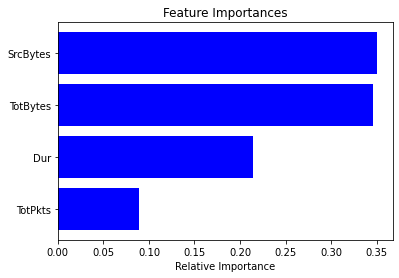

In [ ]:
importances12 = classifier_12.feature_importances_
indices12 = np.argsort(importances12)

plt.title('Feature Importances')
plt.barh(range(len(indices12)), importances12[indices12], color='b', align='center')
plt.yticks(range(len(indices12)), [features[i] for i in indices12])
plt.xlabel('Relative Importance')
plt.show()

**Scenario 13 Model 1**

In [ ]:
scenario_13 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-54/detailed-bidirectional-flow-labels/capture20110815-3.binetflow')

In [ ]:
# Generate binary malicious target column
scenario_13.loc[scenario_13['SrcAddr'] == '147.32.84.165', 'Malicious'] = 1
scenario_13.loc[scenario_13['Malicious'] != 1, 'Malicious'] = 0

In [ ]:
display(scenario_13.loc[scenario_13['SrcAddr'] == '147.32.84.165'])
display(scenario_13.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
14915,2011/08/15 17:16:48.558133,0.000241,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V54-UDP-DNS,1.0
15052,2011/08/15 17:16:50.806904,0.111665,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V54-UDP-DNS,1.0
15062,2011/08/15 17:16:50.919759,0.053440,tcp,147.32.84.165,1027,->,74.125.232.201,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V54-TCP-HTTP-Google-Net-Estab...,1.0
22789,2011/08/15 17:18:59.575757,0.000326,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,226,71,flow=From-Botnet-V54-UDP-DNS,1.0
22790,2011/08/15 17:18:59.581094,8.824491,tcp,147.32.84.165,1039,->,83.133.119.196,80,S_,0.0,NaN,3,186,186,flow=From-Botnet-V54-TCP-Attempt,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921763,2011/08/16 09:34:48.720564,1.308413,tcp,147.32.84.165,23049,->,184.173.217.40,443,S_RA,0.0,0.0,6,366,186,flow=From-Botnet-V54-TCP-Attempt,1.0
1921844,2011/08/16 09:34:51.024297,1.207547,tcp,147.32.84.165,23050,->,184.173.217.40,443,S_RA,0.0,0.0,6,366,186,flow=From-Botnet-V54-TCP-Attempt,1.0
1921938,2011/08/16 09:34:53.227430,1.307525,tcp,147.32.84.165,23051,->,184.173.217.40,443,S_RA,0.0,0.0,6,366,186,flow=From-Botnet-V54-TCP-Attempt,1.0
1922018,2011/08/16 09:34:55.530820,1.308276,tcp,147.32.84.165,23052,->,184.173.217.40,443,S_RA,0.0,0.0,6,366,186,flow=From-Botnet-V54-TCP-Attempt,1.0


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Malicious
0,2011/08/15 17:13:40.449530,504.234436,tcp,90.177.154.197,20127,<?>,147.32.84.144,22,FPA_FPA,0.0,0.0,25518,24184088,681036,flow=Background,0.0
1,2011/08/15 17:13:40.453458,1052.854126,tcp,198.36.38.132,55530,<?>,147.32.86.183,443,FPA_FPA,0.0,0.0,37113,8107174,825680,flow=Background,0.0
2,2011/08/15 17:13:40.456275,1046.228882,udp,41.103.64.21,54617,<->,147.32.86.183,51246,CON,0.0,0.0,24471,6638214,6634822,flow=Background-UDP-Established,0.0
3,2011/08/15 17:13:40.462030,3599.993896,tcp,147.32.80.13,80,<?>,147.32.84.162,60840,PA_A,0.0,0.0,77144,61919076,60398556,flow=From-Background-CVUT-Proxy,0.0
4,2011/08/15 17:13:40.464134,3599.980225,tcp,83.163.158.159,65400,<?>,147.32.84.171,6881,PA_PA,0.0,0.0,269868,256890904,5818939,flow=Background,0.0


In [ ]:
# Break data into target and features
y13 = scenario_13.Malicious
features = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes']
X13 = scenario_13[features].copy()

# Break data into training and testing data (80/20 split)
X13_train, X13_test, y13_train, y13_test, = train_test_split(X13,y13, train_size = 0.8, test_size = 0.2, random_state = 1)

In [ ]:
# Generate base model
classifier_13 = RandomForestClassifier(max_leaf_nodes = 100, random_state = 1)

# Fit model to training data
classifier_13.fit(X13_train,y13_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
predictions13 = classifier_13.predict(X13_test)

accuracy_score(y13_test, predictions13)

0.9944705607355271

In [ ]:
f1_score(y13_test, predictions13)

0.8543875247931059

In [ ]:
labels13 = np.unique(y13_test)
cm13 = confusion_matrix(y13_test, predictions13, labels=labels13)
pd.DataFrame(cm13, index=labels13, columns=labels13)

,0.0,1.0
0.0,376655,153
1.0,1976,6246


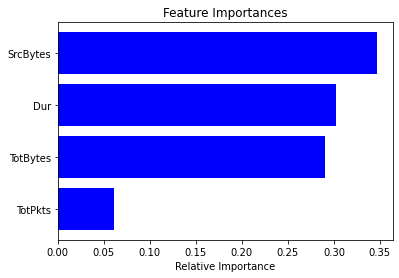

In [ ]:
importances13 = classifier_13.feature_importances_
indices13 = np.argsort(importances13)

plt.title('Feature Importances')
plt.barh(range(len(indices13)), importances13[indices13], color='b', align='center')
plt.yticks(range(len(indices13)), [features[i] for i in indices13])
plt.xlabel('Relative Importance')
plt.show()